In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
import folium 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from math import pi
import datetime as dt
import missingno as mn
from sklearn.impute import SimpleImputer
from keras import backend as K
import keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
import time
import datetime as dt
from datetime import datetime
import collections
import os
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import rcParams
from sklearn import linear_model
from keras.layers import Dense, Dropout

C:\Users\patil\AppData\Local\Temp\ipykernel_27812\2942168182.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [18]:
data = pd.read_csv('C:/Users/patil/OneDrive - Deccan Education Society/Desktop/machine learning/archive/weatherHistory.csv')

In [19]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [20]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [21]:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [22]:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


C:\Users\patil\AppData\Local\Temp\ipykernel_27812\2430126075.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


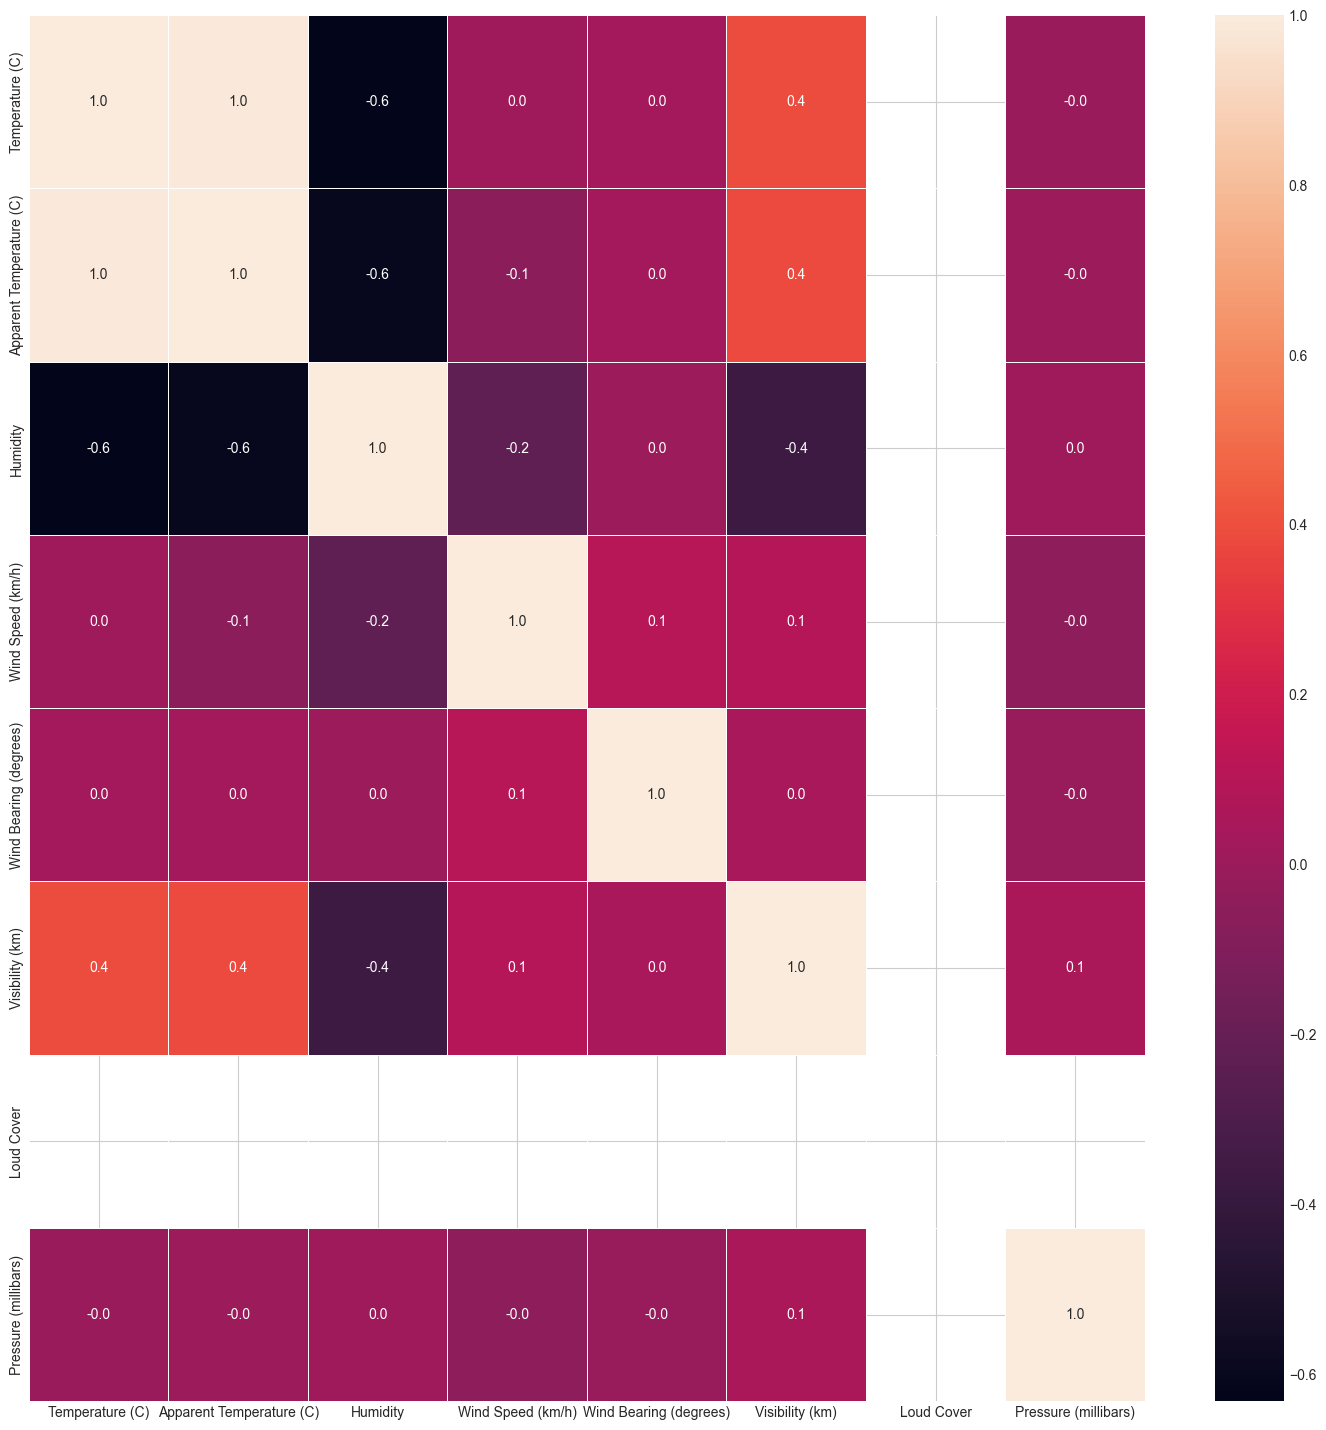

In [23]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()
#compute correlation


In [24]:
data[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

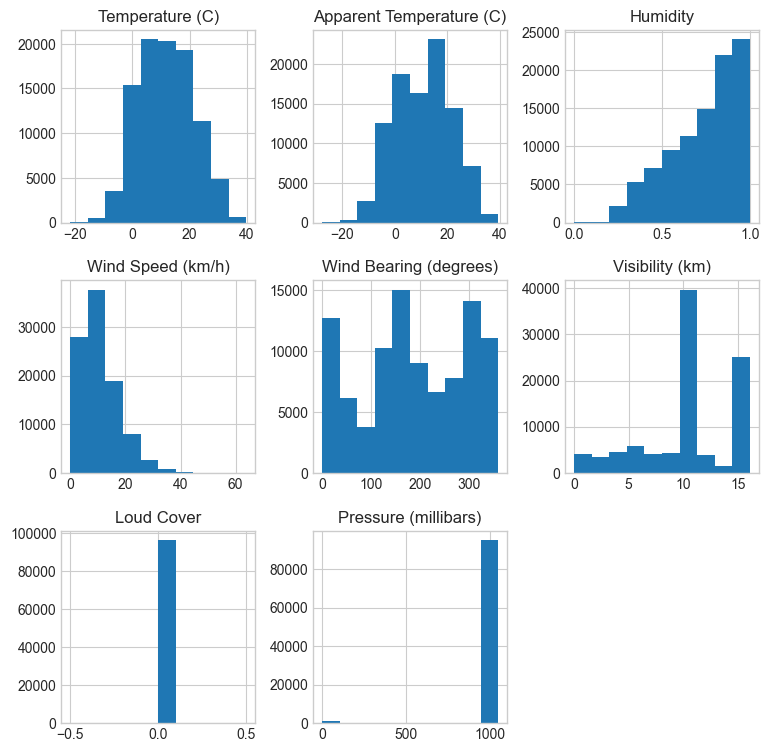

In [25]:
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

<Axes: >

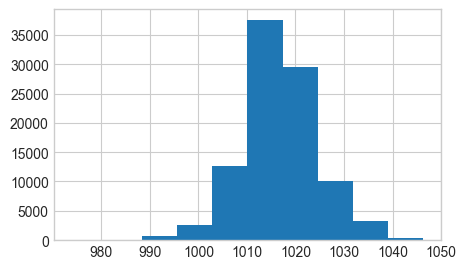

In [26]:
pressure_median = data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
data['Pressure (millibars)'].hist()

<Axes: xlabel='count', ylabel='Summary'>

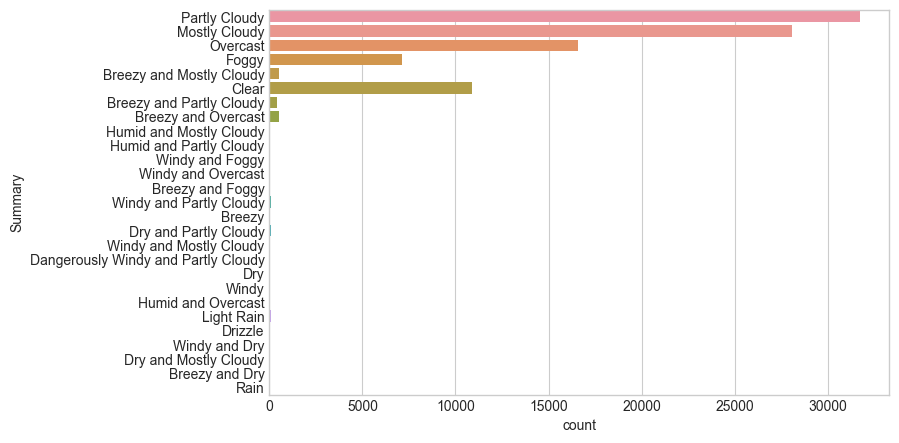

In [27]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])

In [28]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [29]:
data['Summary'].value_counts(dropna=False)


Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [30]:
data['Precip Type'].value_counts(dropna=False)


rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [31]:
data.fillna(method='ffill', inplace=True)


<Axes: xlabel='Precip Type', ylabel='count'>

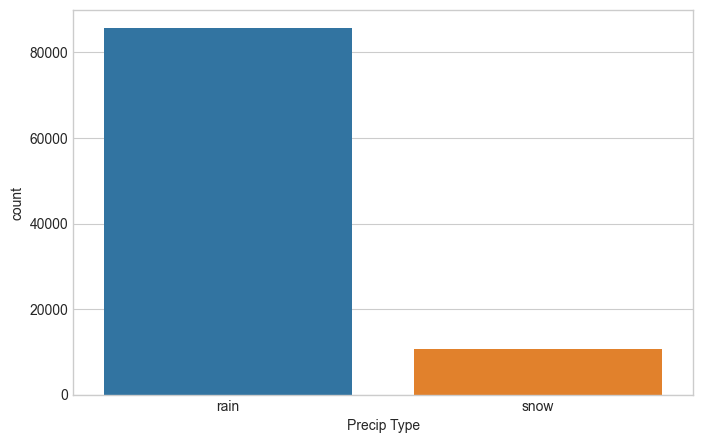

In [32]:
sns.countplot(x=data['Precip Type'])


In [33]:
totalCells = np.product(data.shape)
missingCount = data.isnull().sum()
totalMissing = missingCount.sum()
print("The weather history dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")


The weather history dataset contains 0.0 % missing values.


<Figure size 1800x800 with 0 Axes>

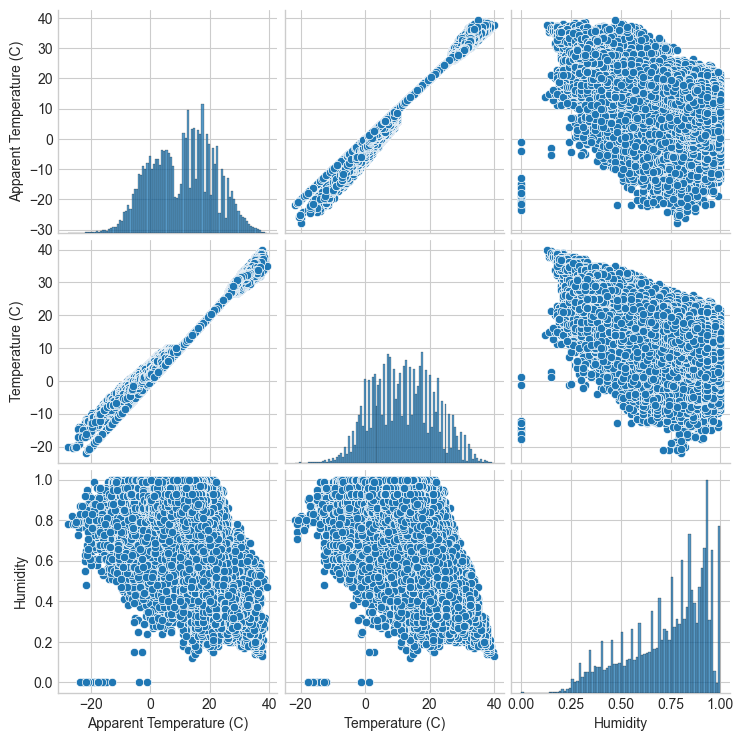

In [34]:
plt.figure(figsize=(18,8))
sns.pairplot(data[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

<Figure size 1800x800 with 0 Axes>

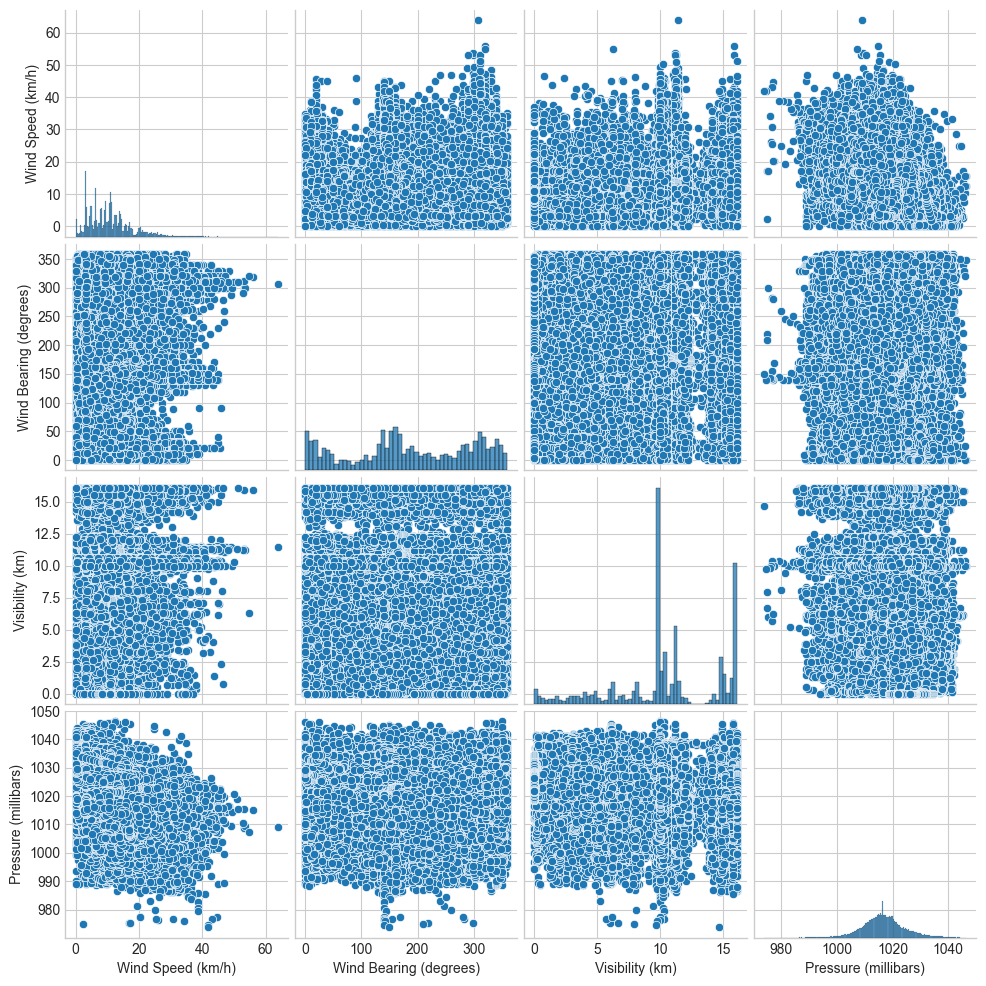

In [35]:
plt.figure(figsize=(18,8))
sns.pairplot(data[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()

In [36]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ls = linear_model.LinearRegression()



X = data["Humidity"].values.reshape(-1,1)
y = data["Temperature (C)"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)
print("Linear Regression")
ls.fit(X_train, y_train)
print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)
print("\n\nCalculating some regression quality metrics")
y_pred = ls.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))
#here variables are humidity and temperature.
#code split the data into testing and training in it 33% is reserved for testing.
#using testing set it calculates the mean squared error and r2 score

Linear Regression
alpha =  [-30.86657506]
beta =  [34.61438171]


Calculating some regression quality metrics
MSE =  54.716241119038216
R2 =  0.40040472046870645


In [37]:
def change_category_to_number(DailySummaryCat):
    if DailySummaryCat=='Partly cloudy throughout the day.':
        return 1
    elif DailySummaryCat=='Mostly cloudy throughout the day.':
        return 2
    elif DailySummaryCat=='Foggy in the evening.':
        return 3
    elif DailySummaryCat=='Foggy overnight and breezy in the morning.':
        return 4
    elif DailySummaryCat=='Overcast throughout the day.':
        return 5
    elif DailySummaryCat=='Partly cloudy until night.':
        return 6
    elif DailySummaryCat=='Motly cloudy until night.':
        return 7
    elif DailySummaryCat=='Foggy starting overnight continuing until morning.':
        return 8
    elif DailySummaryCat=='Foggy in the morning.':
        return 9
    elif DailySummaryCat=='Partly cloudy until evening.':
        return 10
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 11
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until night.':
        return 12
    elif DailySummaryCat=='Partly cloudy starting in the afternoon.':
        return 13
    elif DailySummaryCat=='Partly cloudy starting overnight.':
        return 14
    elif DailySummaryCat=='Mostly cloudy starting overnight.':
        return 15
    elif DailySummaryCat=='Mostly cloudy until night and breezy in the afternoon.':
        return 16
    elif DailySummaryCat=='Mostly cloudy until evening.':
        return 17
    elif DailySummaryCat=='Foggy throughout the day.':
        return 18
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 19
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening.':
        return 20
    elif DailySummaryCat=='Foggy until morning.':
        return 21
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until night.':
        return 22
    elif DailySummaryCat=='Mostly cloudy starting in the morning.':
        return 23
    elif DailySummaryCat=='Foggy starting in the evening.':
        return 24
    elif DailySummaryCat=='Partly cloudy starting in the afternoon continuing until evening.':
        return 25
    elif DailySummaryCat=='Foggy overnight.':
        return 26
    elif DailySummaryCat=='Clear throughout the day.':
        return 27
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until night.':
        return 28
    elif DailySummaryCat=='Partly cloudy overnight.':
        return 29
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening.':
        return 30
    elif DailySummaryCat=='Foggy until night.':
        return 31
    elif DailySummaryCat=='Partly cloudy in the morning.':
        return 32
    elif DailySummaryCat=='Foggy starting overnight continuing until afternoon.':
        return 33
    elif DailySummaryCat=='Foggy until afternoon.':
        return 34
    elif DailySummaryCat=='Breezy and mostly cloudy overnight.':
        return 35
    elif DailySummaryCat=='Partly cloudy overnight and breezy starting in the morning continuing until afternoon.':
        return 36
    elif DailySummaryCat=='Breezy in the morning and foggy in the evening.':
        return 37
    elif DailySummaryCat=='Mostly cloudy until evening and breezy in the evening.':
        return 38
    elif DailySummaryCat=='Mostly cloudy starting in the evening.':
        return 39
    elif DailySummaryCat=='Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.':
        return 40
    elif DailySummaryCat=='Breezy starting in the morning continuing until night.':
        return 41
    elif DailySummaryCat=='Overcast throughout the day and breezy starting overnight continuing until morning.':
        return 42
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and foggy in the evening.':
        return 43
    elif DailySummaryCat=='Light rain until morning.':
        return 44
    elif DailySummaryCat=='Mostly cloudy until night and breezy starting in the afternoon continuing until night.':
        return 45
    elif DailySummaryCat=='Mostly cloudy starting in the morning continuing until afternoon.':
        return 46
    elif DailySummaryCat=='Breezy until afternoon and overcast throughout the day.':
        return 47
    elif DailySummaryCat=='Partly cloudy until evening and breezy in the afternoon.':
        return 48
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.':
        return 49
    elif DailySummaryCat=='Light rain starting overnight.':
        return 50
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.':
        return 51
    elif DailySummaryCat=='Foggy starting in the morning continuing until evening and breezy in the evening.':
        return 52
    elif DailySummaryCat=='Partly cloudy throughout the day and breezy in the afternoon.':
        return 53
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.':
        return 54
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy in the morning.':
        return 55
    elif DailySummaryCat=='Overcast throughout the day and breezy overnight.':
        return 56
    elif DailySummaryCat=='Light rain in the morning.':
        return 57
    elif DailySummaryCat=='Rain until morning.':
        return 58
    elif DailySummaryCat=='Breezy in the morning and mostly cloudy starting in the evening.':
        return 59
    elif DailySummaryCat=='Mostly cloudy starting in the morning and breezy overnight.':
        return 60
    elif DailySummaryCat=='Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.':
        return 61
    elif DailySummaryCat=='Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.':
        return 62
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening and breezy in the afternoon.':
        return 63
    elif DailySummaryCat=='Foggy starting overnight continuing until morning and breezy in the afternoon.':
        return 64

In [38]:
data['DailySummaryCat'] = data['Daily Summary'].apply(change_category_to_number)


In [39]:
data.fillna(method='ffill', inplace=True) 


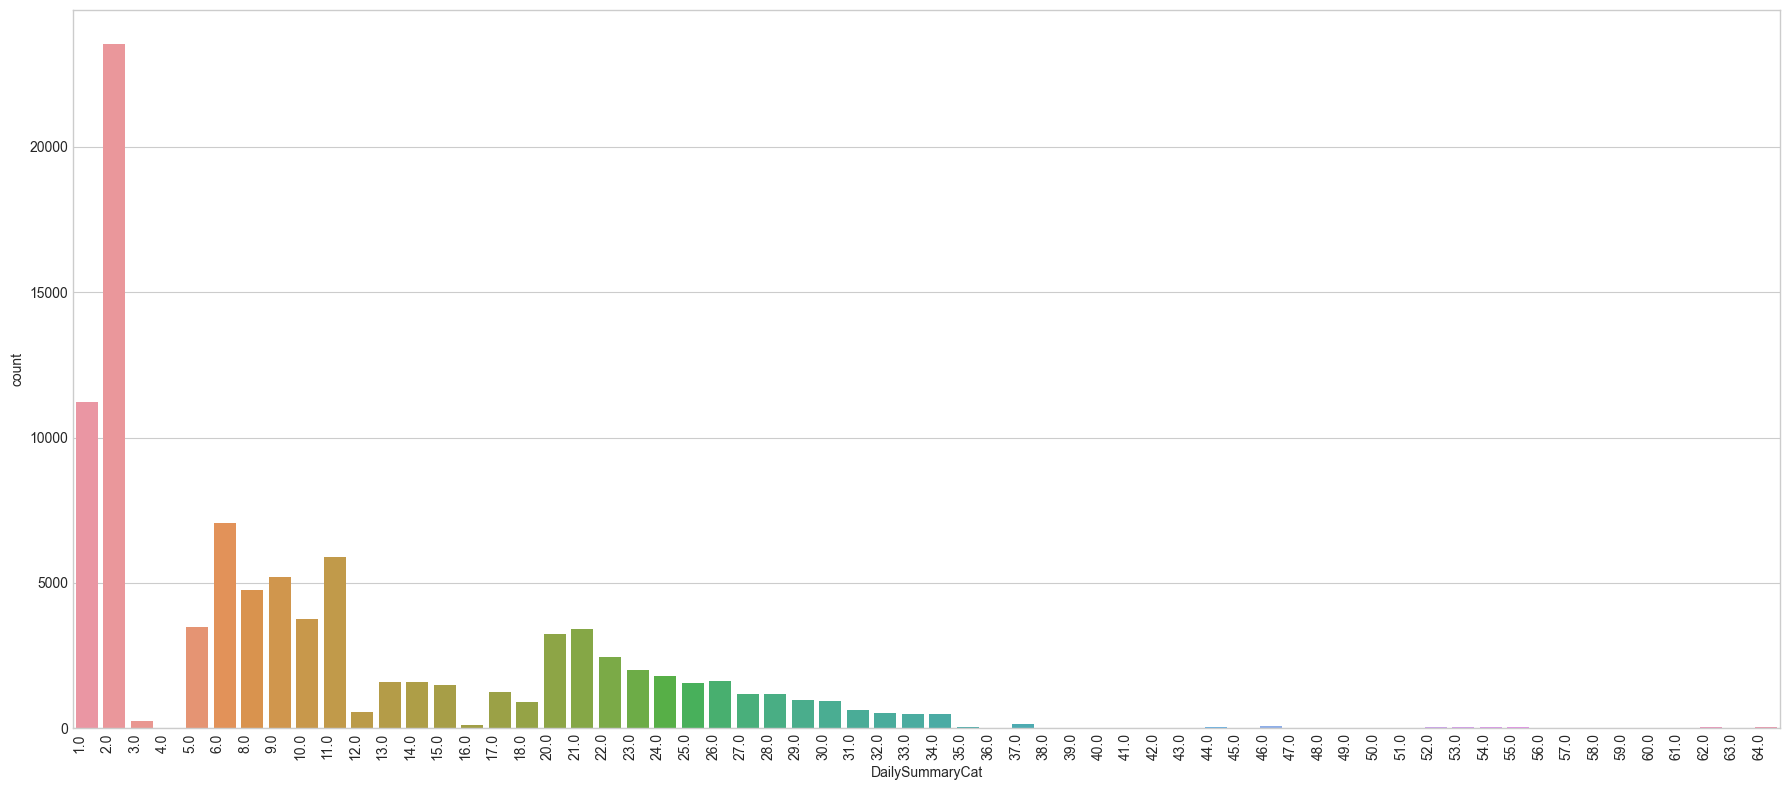

In [40]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x=data['DailySummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()